<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CREDIT CARD FRAUD DETECTION, RANDOM FOREST & BOOSTING ALGORITHMS**

### **Import Necessary libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_curve,
    auc,
)
import matplotlib.pyplot as plt

### **Load  Dataset**

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the credit card fraud dataset from Google Drive
credit_card = pd.read_csv('/content/drive/My Drive/creditcard.csv')

Mounted at /content/drive


### **EXPLORATORY DATA ANALYSIS**

### **Missing Value Analysis**

In [ ]:
missing_values = credit_card.isnull().sum()
print(missing_values)



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### **Data Visualisation**

In [ ]:
credit_card.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**Dataset Information**

In [ ]:
# dataset information
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 >>>>> Genuine Transactions >>>> 284315

1 >>>>> Fraudulent Transactions >>>> 492

In [ ]:
credit_card.shape

(284807, 31)

### **Visual Representation of Instances per Class**

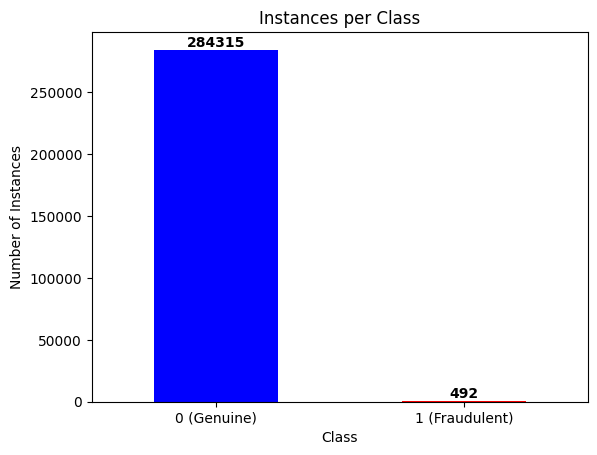

In [ ]:
import matplotlib.pyplot as plt

#visual representation of instances per class

# Count the instances per class
class_counts = credit_card['Class'].value_counts()

# Define bar colors
colors = ['red' if i == 1 else 'blue' for i in class_counts.index]

# Create the bar plot
ax = class_counts.plot(kind='bar', color=colors)

# Annotate the bars with the actual count
for i, count in enumerate(class_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom', color='black', fontweight='bold')

# Label x-axis with 0 and 1
plt.xticks(range(len(class_counts)), ['0 (Genuine)', '1 (Fraudulent)'], rotation=0)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Instances per Class')

# Show the plot
plt.show()


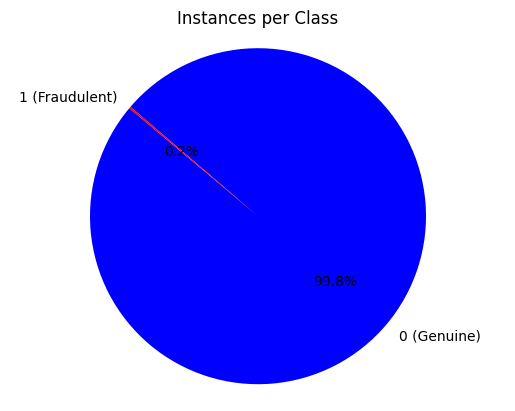

In [ ]:
# Count the instances per class
class_counts = credit_card['Class'].value_counts()

# Define labels for the pie chart
labels = ['0 (Genuine)', '1 (Fraudulent)']

# Define colors for the pie chart
colors = ['blue', 'red']

# Create a pie chart
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Instances per Class')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Create subplots for "Fraudulent" and "Genuine" transactions**

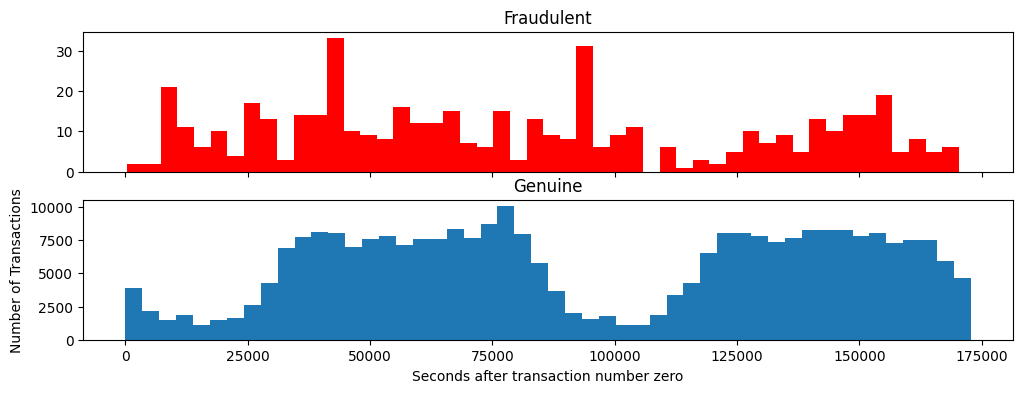

In [ ]:
# Create subplots for "Fraudulent" and "Genuine" transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

# Histogram for "Fraudulent" transactions (make it red)
ax1.hist(credit_card["Time"][credit_card["Class"] == 1], bins=50, color='red')
ax1.set_title('Fraudulent')

# Histogram for "Genuine" transactions
ax2.hist(credit_card["Time"][credit_card["Class"] == 0], bins=50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

### **Draw Histograms**

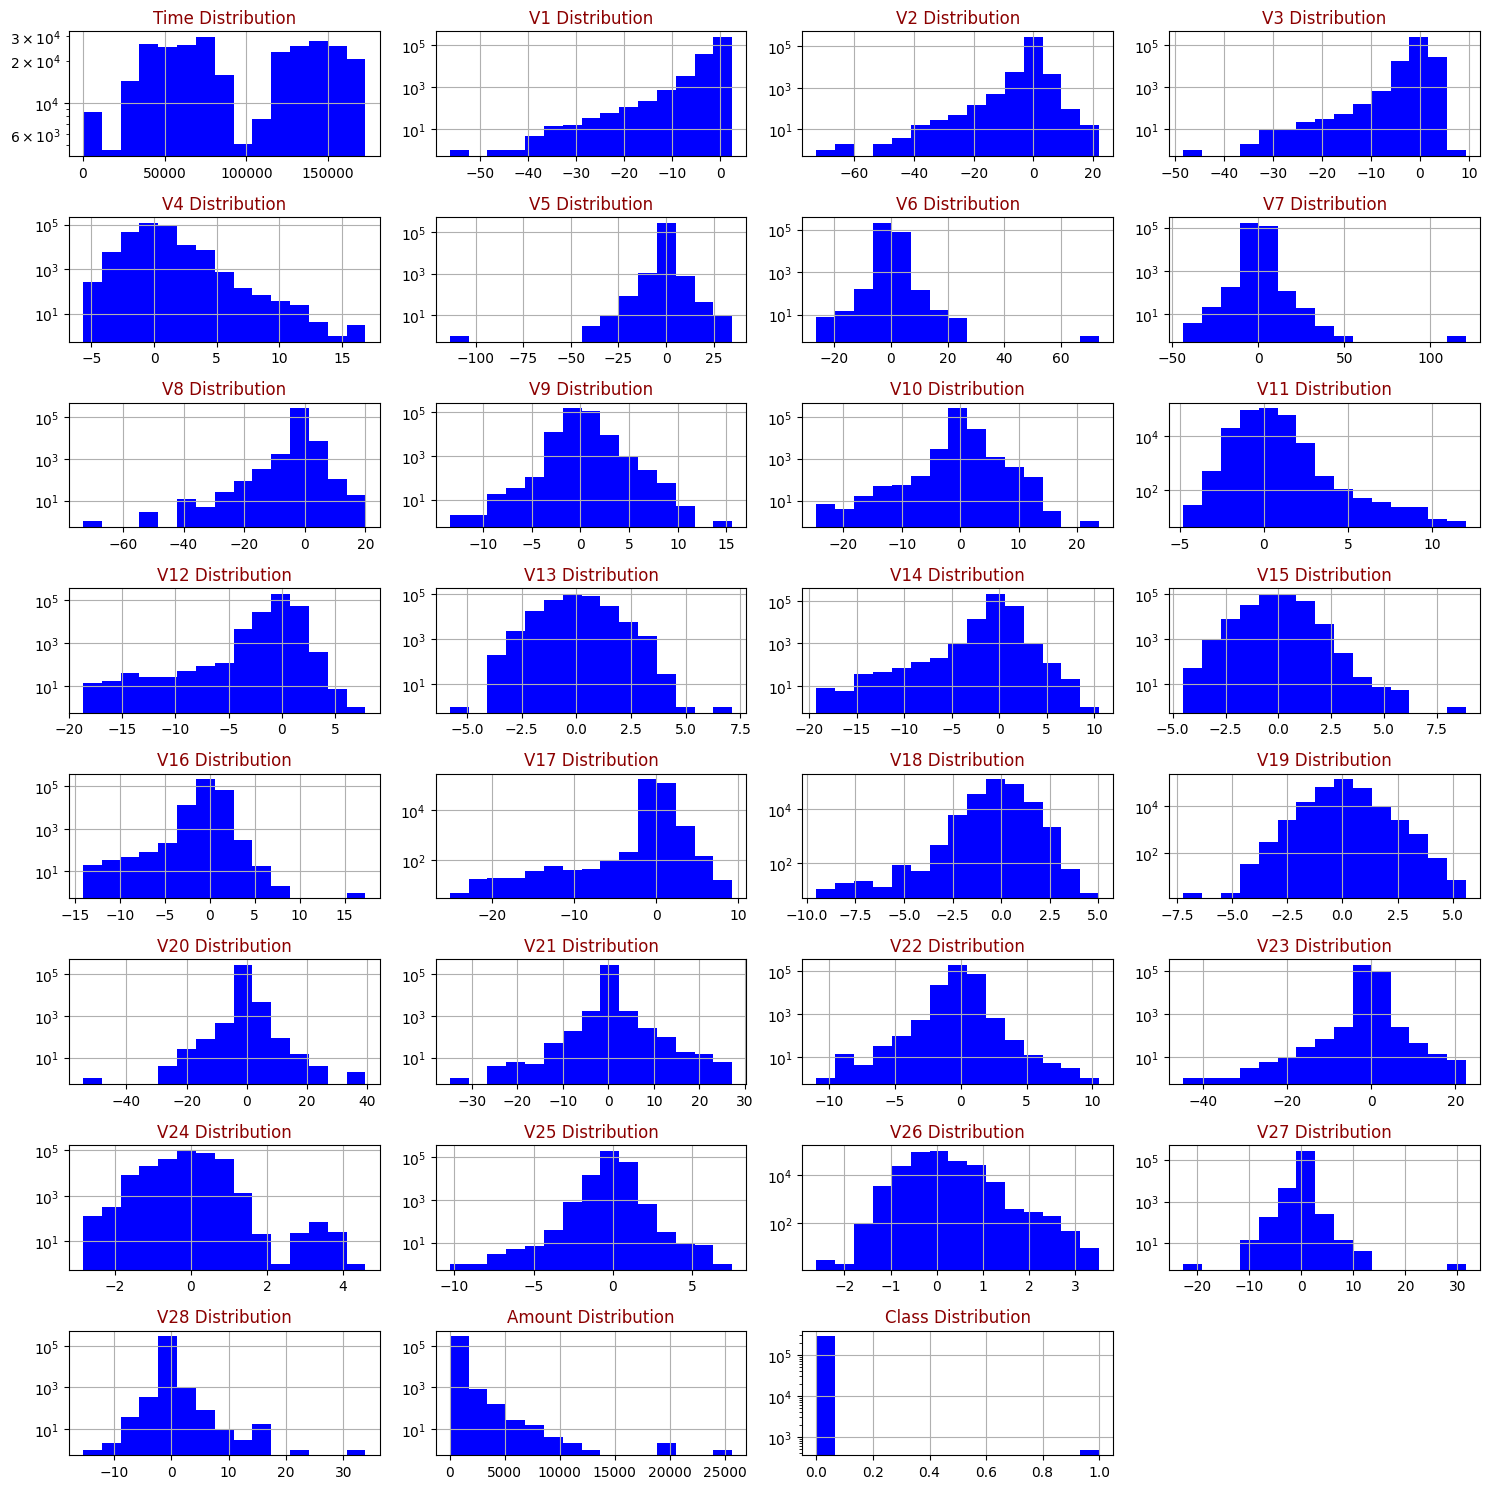

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=15,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

draw_histograms(credit_card, credit_card.columns, 8, 4)


In [ ]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
credit_card['Class'].nunique()

2

In [ ]:
#number of instances per class
credit_card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Plot transaction frequency by hour for genuine transactions**

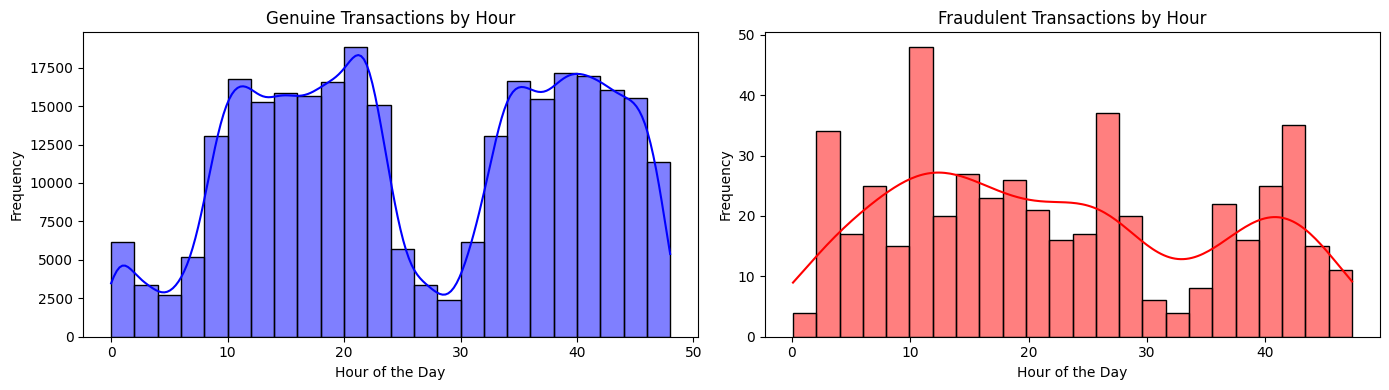

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "Time" feature to hours and create a new column
credit_card['Hour'] = credit_card['Time'] / 3600

# Create separate DataFrames for genuine and fraudulent transactions
genuine_transactions = credit_card[credit_card['Class'] == 0]
fraudulent_transactions = credit_card[credit_card['Class'] == 1]

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot transaction frequency by hour for genuine transactions
sns.histplot(genuine_transactions['Hour'], bins=24, ax=ax1, color='blue', kde=True)
ax1.set_title('Genuine Transactions by Hour')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Frequency')

# Plot transaction frequency by hour for fraudulent transactions
sns.histplot(fraudulent_transactions['Hour'], bins=24, ax=ax2, color='red', kde=True)
ax2.set_title('Fraudulent Transactions by Hour')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Plot features distributions using kernel density plots**

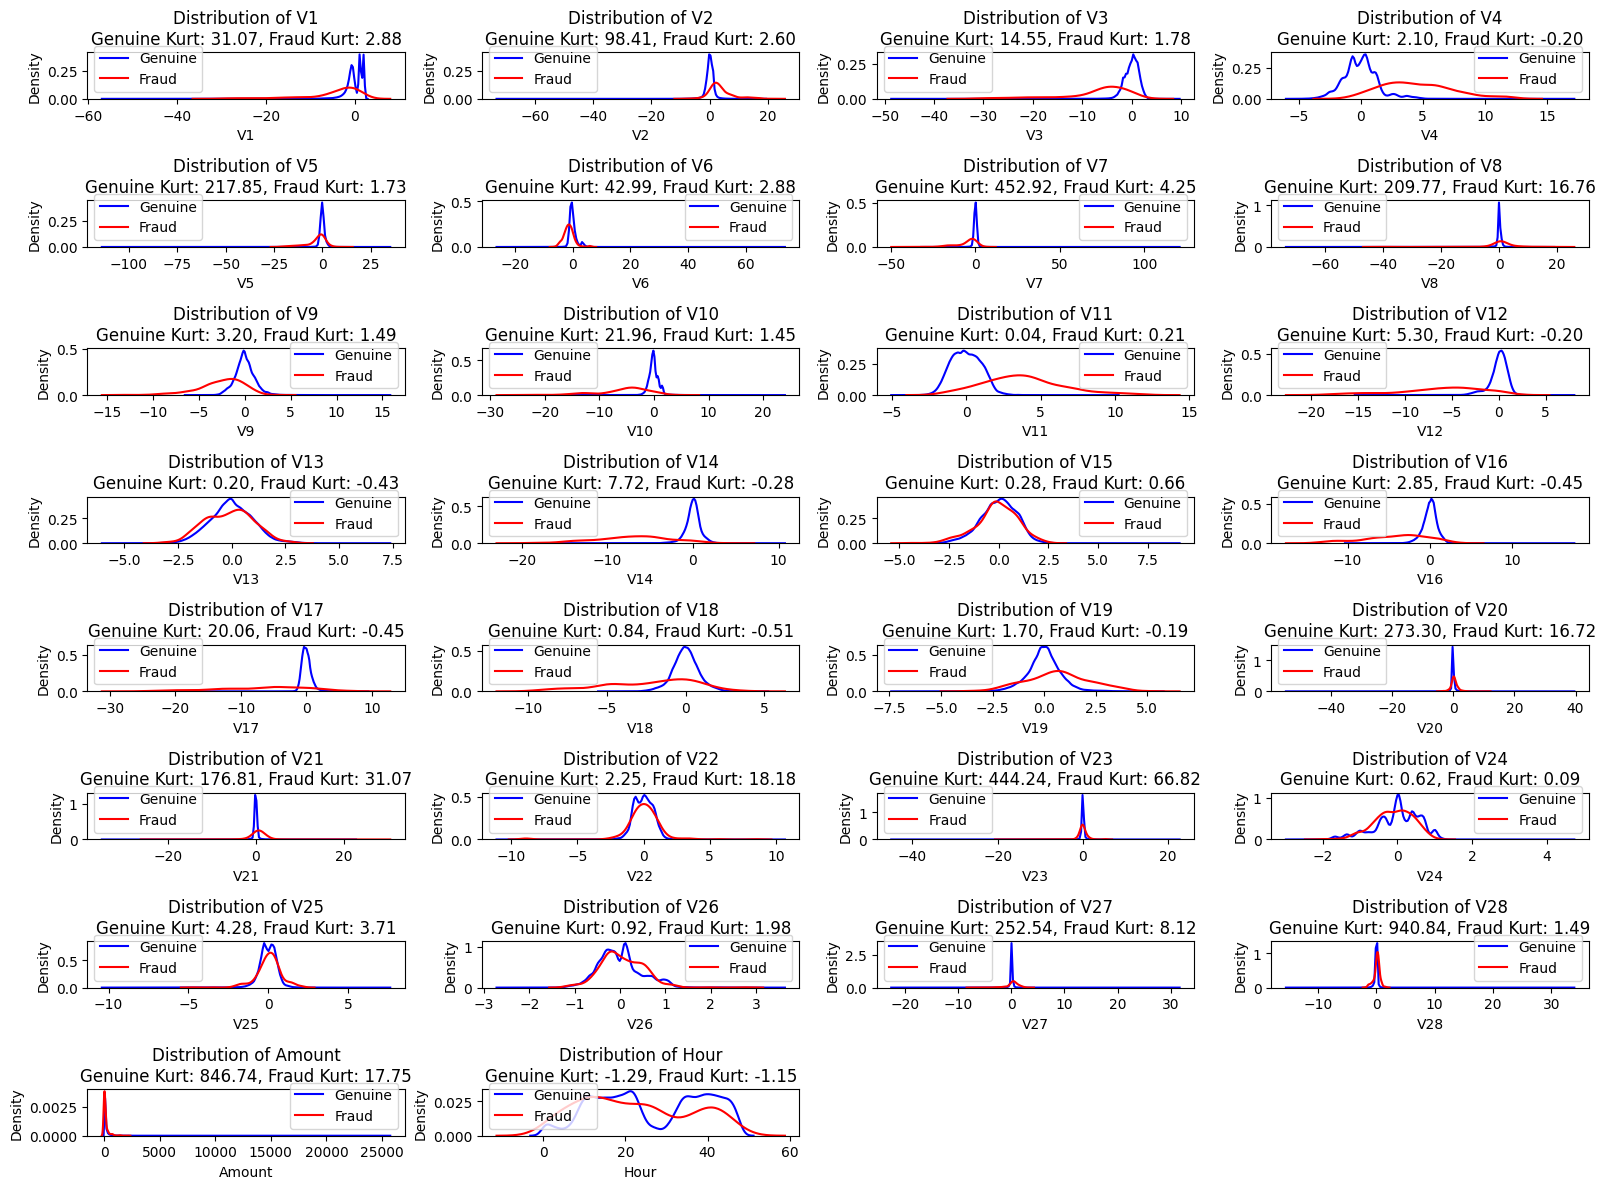

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of features to visualize (excluding 'Class' and 'Time')
features_to_visualize = [col for col in credit_card.columns if col not in ['Class', 'Time']]

# Set the number of columns and rows for subplots
num_cols = 4
num_rows = (len(features_to_visualize) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Iterate through features and create distribution plots
for i, feature in enumerate(features_to_visualize):
    # Create separate distributions for genuine and fraudulent transactions
    genuine_data = credit_card[credit_card['Class'] == 0][feature]
    fraudulent_data = credit_card[credit_card['Class'] == 1][feature]

    # Plot feature distributions using kernel density plots (KDE)
    sns.kdeplot(genuine_data, label='Genuine', ax=axes[i], color='blue')
    sns.kdeplot(fraudulent_data, label='Fraud', ax=axes[i], color='red')

    # Calculate kurtosis for each class
    genuine_kurtosis = genuine_data.kurtosis()
    fraudulent_kurtosis = fraudulent_data.kurtosis()

    # Set labels and titles for each subplot including kurtosis
    axes[i].set_title(f'Distribution of {feature}\nGenuine Kurt: {genuine_kurtosis:.2f}, Fraud Kurt: {fraudulent_kurtosis:.2f}')
    axes[i].set_xlabel(feature)
    axes[i].legend()

# Hide any remaining empty subplots
for i in range(len(features_to_visualize), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()
plt.show()


### **Summary Statistics**

In [ ]:
# Descriptive Statistics
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,26.337183
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.191152
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.055972
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.525556
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.700139
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.997778


In [ ]:
selected_variables = ['Time', 'Amount', 'Class']
selected_data = credit_card[selected_variables]

# Get descriptive statistics rounded to two decimal places
descriptive_stats = selected_data.describe().round(2)

# Print the descriptive statistics
print(descriptive_stats)

            Time     Amount      Class
count  284807.00  284807.00  284807.00
mean    94813.86      88.35       0.00
std     47488.15     250.12       0.04
min         0.00       0.00       0.00
25%     54201.50       5.60       0.00
50%     84692.00      22.00       0.00
75%    139320.50      77.16       0.00
max    172792.00   25691.16       1.00


**Class Counts**

In [ ]:
class_counts = credit_card.Class.value_counts()
class_ratios = class_counts / credit_card.Class.count()
class_info = pd.DataFrame({"Counts": class_counts, "Percentages": class_ratios})
print(class_info)

   Counts  Percentages
0  284315     0.998273
1     492     0.001727


In [ ]:
class_counts = credit_card.Class.value_counts()
total_samples = credit_card.shape[0]
class_ratios = class_counts / total_samples
class_percentages = (class_counts / total_samples) * 100

class_info = pd.DataFrame({"Count": class_counts, "Ratio": class_ratios, "Percentage": class_percentages})
print(class_info)


    Count     Ratio  Percentage
0  284315  0.998273   99.827251
1     492  0.001727    0.172749


In [ ]:
class_counts = credit_card.Class.value_counts()
total_samples = credit_card.shape[0]
class_ratios = class_counts / total_samples
class_percentages = (class_counts / total_samples) * 100

class_info = pd.DataFrame({"Class": ["Genuine", "Fraudulent"], "Count": class_counts.values, "Ratio": class_ratios.values, "Percentage": class_percentages.values})
print(class_info)


        Class   Count     Ratio  Percentage
0     Genuine  284315  0.998273   99.827251
1  Fraudulent     492  0.001727    0.172749


In [ ]:
# Descriptive Statistics for Fraudulent Transactions
print("Fraudulent Transactions")
credit_card['Amount'][credit_card['Class']==1]. describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Descriptive Statistics for Genuine Transactions
print("Genuine Transactions")
credit_card['Amount'][credit_card['Class']==0]. describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### **Correlation Analysis**

In [ ]:
correlation_matrix = credit_card.corr()
round(correlation_matrix, 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01,1.00
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10,0.12
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09,-0.01
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19,-0.42
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13,-0.11
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09,0.17
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04,-0.06
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19,0.08
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02,-0.04
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10,-0.01


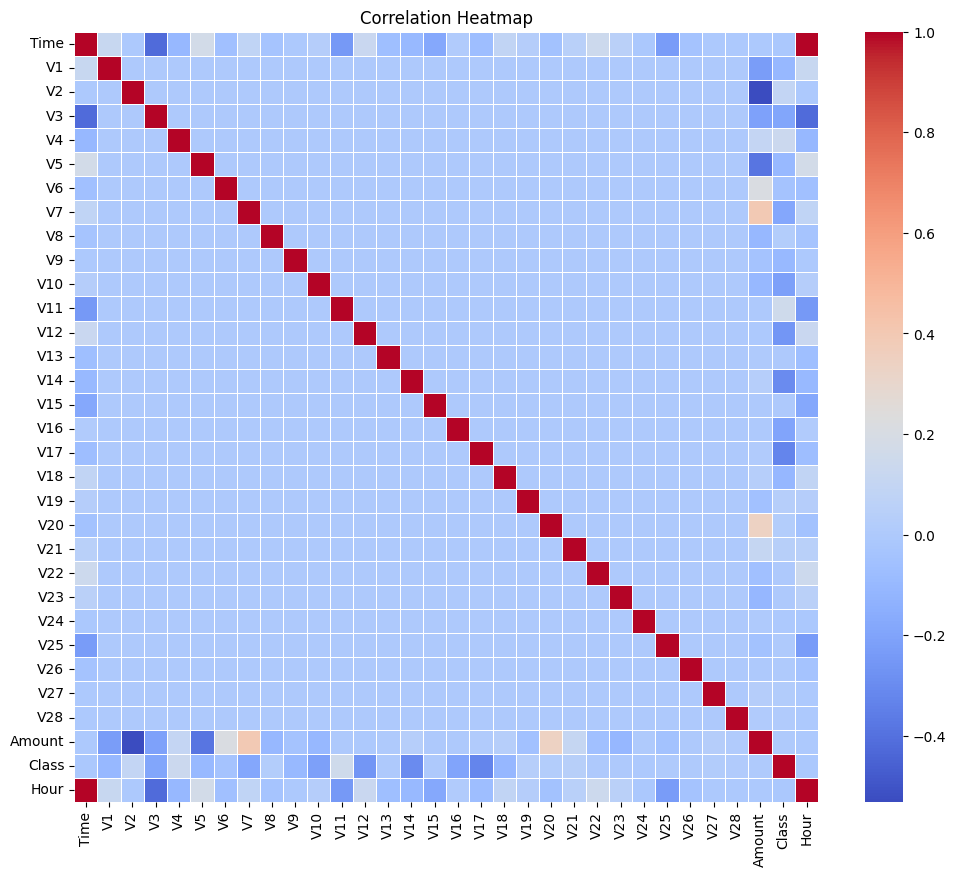

In [ ]:
# Calculate the correlation matrix
correlation_matrix = credit_card.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()



### **Outlier Detection**

### **Box Plot**

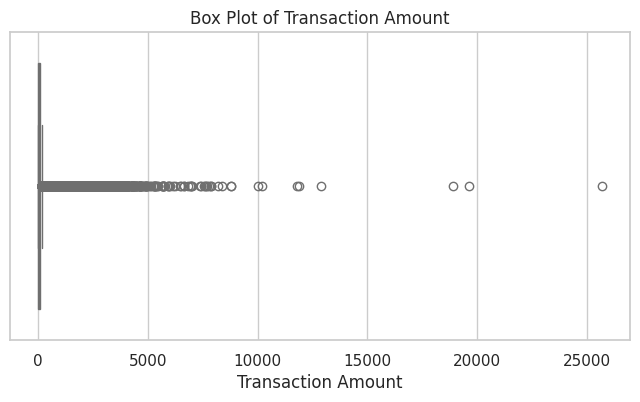

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot for the "Amount" feature
plt.figure(figsize=(8, 4))
sns.boxplot(x=credit_card['Amount'], color='skyblue')
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()


<Axes: xlabel='Class', ylabel='Amount'>

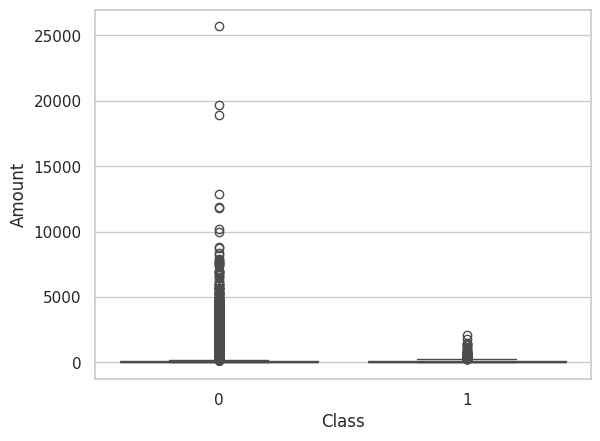

In [ ]:
# Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=credit_card['Class'], y=credit_card['Amount'])

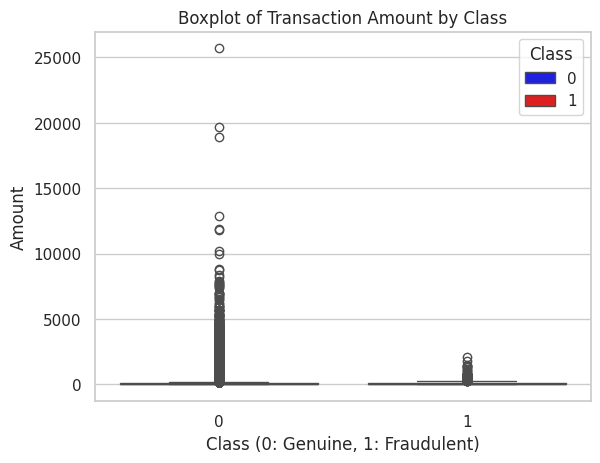

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a boxplot with different colors for Class categories
sns.boxplot(x='Class', y='Amount', data=credit_card, hue='Class', palette={0: "blue", 1: "red"})

# Set labels and title
plt.xlabel("Class (0: Genuine, 1: Fraudulent)")
plt.ylabel("Amount")
plt.title("Boxplot of Transaction Amount by Class")

# Show the plot
plt.show()

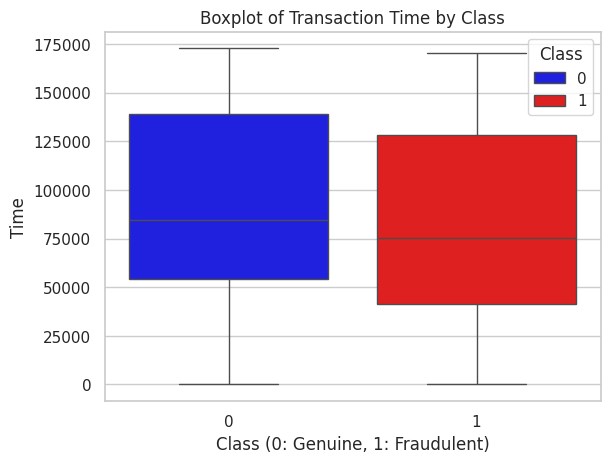

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a boxplot with different colors for Class categories
sns.boxplot(x='Class', y='Time', data=credit_card, hue='Class', palette={0: "blue", 1: "red"})

# Set labels and title
plt.xlabel("Class (0: Genuine, 1: Fraudulent)")
plt.ylabel("Time")
plt.title("Boxplot of Transaction Time by Class")

# Show the plot
plt.show()

In [ ]:
credit_card.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


## **DATA PREPROCESSING**

### **Dropping Irrelevant  Column "Hour"**

In [ ]:
credit_card.drop('Hour', axis=1, inplace=True)


In [ ]:
credit_card.head ()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Feature Scaling / Normalization**

In [ ]:
from sklearn.preprocessing import RobustScaler

credit_card['Amount'] = RobustScaler().fit_transform(credit_card['Amount'].to_numpy().reshape(-1, 1))
time = credit_card['Time']
credit_card['Time'] = (time - time.min()) / (time.max() - time.min())
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [ ]:
correlation_matrix = credit_card.corr()
round(correlation_matrix, 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


### **Experimentation Using 80:20 Split Ratio**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_curve,
    auc,
)
import matplotlib.pyplot as plt



# Split the dataset into features (X) and target (y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']


# Experimentation Using 80:20 Split Ratio
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
gradientboost_classifier = GradientBoostingClassifier(random_state=42)
catboost_classifier = CatBoostClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)

# Initialize ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ("rf", rf_classifier),
        ("xgb", xgb_classifier),
        ("adaboost", adaboost_classifier),
        ("gradientboost", gradientboost_classifier),
        ("catboost", catboost_classifier),
        ("lgbm", lgbm_classifier),
    ],
    voting="soft",
)

# Create dictionaries to store evaluation results
individual_results = {}
ensemble_results = {}

# For each classifier
for classifier, name in zip(
    [rf_classifier, xgb_classifier, adaboost_classifier, gradientboost_classifier, catboost_classifier, lgbm_classifier],
    ["Random Forest", "XGBoost", "AdaBoost", "Gradient Boost", "CatBoost", "LightGBM"],
):
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict class probabilities and labels
    y_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    prc_auc = auc(recall, precision)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

    # Store results in dictionary
    individual_results[name] = {
        "Accuracy": accuracy,
        "PRC AUC": prc_auc,
        "Classification Report": report,
    }

# Display individual classifier results
for classifier_name, results in individual_results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"PRC AUC: {results['PRC AUC']}")
    print("Classification Report:")
    print(pd.DataFrame(results['Classification Report']).transpose())
    print("\n")




Learning rate set to 0.104628
0:	learn: 0.3613224	total: 130ms	remaining: 2m 10s
1:	learn: 0.2109429	total: 202ms	remaining: 1m 40s
2:	learn: 0.1109883	total: 262ms	remaining: 1m 27s
3:	learn: 0.0607033	total: 324ms	remaining: 1m 20s
4:	learn: 0.0355491	total: 394ms	remaining: 1m 18s
5:	learn: 0.0226898	total: 466ms	remaining: 1m 17s
6:	learn: 0.0152194	total: 524ms	remaining: 1m 14s
7:	learn: 0.0109353	total: 589ms	remaining: 1m 13s
8:	learn: 0.0084024	total: 648ms	remaining: 1m 11s
9:	learn: 0.0064731	total: 707ms	remaining: 1m 9s
10:	learn: 0.0054341	total: 765ms	remaining: 1m 8s
11:	learn: 0.0046470	total: 818ms	remaining: 1m 7s
12:	learn: 0.0041520	total: 883ms	remaining: 1m 7s
13:	learn: 0.0037802	total: 943ms	remaining: 1m 6s
14:	learn: 0.0034693	total: 999ms	remaining: 1m 5s
15:	learn: 0.0032813	total: 1.06s	remaining: 1m 5s
16:	learn: 0.0031375	total: 1.12s	remaining: 1m 4s
17:	learn: 0.0029939	total: 1.18s	remaining: 1m 4s
18:	learn: 0.0029096	total: 1.25s	remaining: 1m 4s
19

### **Experimentation Using 70:30 Split Ratio**

In [ ]:
# Experimentation Using 70:30 Split Ratio

# Split the dataset into features (X) and target (y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
gradientboost_classifier = GradientBoostingClassifier(random_state=42)
catboost_classifier = CatBoostClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)

# Initialize ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ("rf", rf_classifier),
        ("xgb", xgb_classifier),
        ("adaboost", adaboost_classifier),
        ("gradientboost", gradientboost_classifier),
        ("catboost", catboost_classifier),
        ("lgbm", lgbm_classifier),
    ],
    voting="soft",
)

# Create dictionaries to store evaluation results
individual_results = {}
ensemble_results = {}

# For each classifier
for classifier, name in zip(
    [rf_classifier, xgb_classifier, adaboost_classifier, gradientboost_classifier, catboost_classifier, lgbm_classifier],
    ["Random Forest", "XGBoost", "AdaBoost", "Gradient Boost", "CatBoost", "LightGBM"],
):
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict class probabilities and labels
    y_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    prc_auc = auc(recall, precision)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

    # Store results in dictionary
    individual_results[name] = {
        "Accuracy": accuracy,
        "PRC AUC": prc_auc,
        "Classification Report": report,
    }

# Display individual classifier results
for classifier_name, results in individual_results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"PRC AUC: {results['PRC AUC']}")
    print("Classification Report:")
    print(pd.DataFrame(results['Classification Report']).transpose())
    print("\n")



Learning rate set to 0.098829
0:	learn: 0.3722340	total: 86.1ms	remaining: 1m 25s
1:	learn: 0.2146511	total: 159ms	remaining: 1m 19s
2:	learn: 0.1174255	total: 228ms	remaining: 1m 15s
3:	learn: 0.0666495	total: 298ms	remaining: 1m 14s
4:	learn: 0.0398470	total: 391ms	remaining: 1m 17s
5:	learn: 0.0255619	total: 495ms	remaining: 1m 22s
6:	learn: 0.0172867	total: 607ms	remaining: 1m 26s
7:	learn: 0.0124887	total: 727ms	remaining: 1m 30s
8:	learn: 0.0095262	total: 849ms	remaining: 1m 33s
9:	learn: 0.0075404	total: 968ms	remaining: 1m 35s
10:	learn: 0.0060842	total: 1.08s	remaining: 1m 36s
11:	learn: 0.0052263	total: 1.19s	remaining: 1m 38s
12:	learn: 0.0046630	total: 1.31s	remaining: 1m 39s
13:	learn: 0.0042183	total: 1.4s	remaining: 1m 38s
14:	learn: 0.0039085	total: 1.51s	remaining: 1m 39s
15:	learn: 0.0036685	total: 1.63s	remaining: 1m 40s
16:	learn: 0.0034436	total: 1.73s	remaining: 1m 39s
17:	learn: 0.0032938	total: 1.84s	remaining: 1m 40s
18:	learn: 0.0031320	total: 1.93s	remaining:

### **Experimentation Using 60:40 Split Ratio**

In [ ]:
# Experimentation Using 60:40 Split Ratio

## Split the dataset into features (X) and target (y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
gradientboost_classifier = GradientBoostingClassifier(random_state=42)
catboost_classifier = CatBoostClassifier(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)

# Initialize ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ("rf", rf_classifier),
        ("xgb", xgb_classifier),
        ("adaboost", adaboost_classifier),
        ("gradientboost", gradientboost_classifier),
        ("catboost", catboost_classifier),
        ("lgbm", lgbm_classifier),
    ],
    voting="soft",
)

# Create dictionaries to store evaluation results
individual_results = {}
ensemble_results = {}

# For each classifier
for classifier, name in zip(
    [rf_classifier, xgb_classifier, adaboost_classifier, gradientboost_classifier, catboost_classifier, lgbm_classifier],
    ["Random Forest", "XGBoost", "AdaBoost", "Gradient Boost", "CatBoost", "LightGBM"],
):
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict class probabilities and labels
    y_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    prc_auc = auc(recall, precision)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

    # Store results in dictionary
    individual_results[name] = {
        "Accuracy": accuracy,
        "PRC AUC": prc_auc,
        "Classification Report": report,
    }

# Display individual classifier results
for classifier_name, results in individual_results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"PRC AUC: {results['PRC AUC']}")
    print("Classification Report:")
    print(pd.DataFrame(results['Classification Report']).transpose())
    print("\n")


Learning rate set to 0.092533
0:	learn: 0.3888501	total: 54.6ms	remaining: 54.6s
1:	learn: 0.2321425	total: 104ms	remaining: 52.1s
2:	learn: 0.1330634	total: 154ms	remaining: 51.2s
3:	learn: 0.0772071	total: 210ms	remaining: 52.2s
4:	learn: 0.0462642	total: 256ms	remaining: 51s
5:	learn: 0.0294858	total: 302ms	remaining: 50.1s
6:	learn: 0.0198392	total: 348ms	remaining: 49.4s
7:	learn: 0.0140990	total: 401ms	remaining: 49.8s
8:	learn: 0.0105760	total: 451ms	remaining: 49.7s
9:	learn: 0.0083489	total: 498ms	remaining: 49.3s
10:	learn: 0.0068427	total: 545ms	remaining: 49s
11:	learn: 0.0057073	total: 594ms	remaining: 48.9s
12:	learn: 0.0049799	total: 647ms	remaining: 49.1s
13:	learn: 0.0044365	total: 696ms	remaining: 49s
14:	learn: 0.0040365	total: 756ms	remaining: 49.6s
15:	learn: 0.0037397	total: 801ms	remaining: 49.2s
16:	learn: 0.0035099	total: 845ms	remaining: 48.9s
17:	learn: 0.0033489	total: 894ms	remaining: 48.7s
18:	learn: 0.0032188	total: 942ms	remaining: 48.7s
19:	learn: 0.003

### ***Experimentation with Voting Schemes                             ***

### **Ensemble of Random Forest plus Boosting Algorithms Using Soft Voting**

In [ ]:
# Experimentation with Voting Scheme Random Forest + Boosting Algorithm
# Using Soft Voting Scheme

# For each boosting algorithm
for boosting_algorithm in ["XGBoost", "AdaBoost", "Gradient Boost", "CatBoost", "LightGBM"]:
    # Initialize Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Initialize the specific boosting classifier
    if boosting_algorithm == "XGBoost":
        boosting_classifier = XGBClassifier(random_state=42)
    elif boosting_algorithm == "AdaBoost":
        boosting_classifier = AdaBoostClassifier(random_state=42)
    elif boosting_algorithm == "Gradient Boost":
        boosting_classifier = GradientBoostingClassifier(random_state=42)
    elif boosting_algorithm == "CatBoost":
        boosting_classifier = CatBoostClassifier(random_state=42)
    elif boosting_algorithm == "LightGBM":
        boosting_classifier = LGBMClassifier(random_state=42)

    # Initialize ensemble classifier with soft voting
    ensemble_classifier = VotingClassifier(
        estimators=[("rf", rf_classifier), (boosting_algorithm, boosting_classifier)], voting="soft"
    )

    # Fit Random Forest and the specific boosting classifier to the training data
    rf_classifier.fit(X_train, y_train)
    boosting_classifier.fit(X_train, y_train)

    # Combine them in an ensemble with soft voting
    ensemble_classifier.fit(X_train, y_train)

    # Predict class probabilities and labels using the ensemble
    y_prob_ensemble = ensemble_classifier.predict_proba(X_test)[:, 1]
    y_pred_ensemble = ensemble_classifier.predict(X_test)

    # Calculate accuracy for the ensemble
    accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

    # Calculate Precision-Recall curve and AUC for the ensemble
    precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, y_prob_ensemble)
    prc_auc_ensemble = auc(recall_ensemble, precision_ensemble)

    # Generate classification report for the ensemble
    report_ensemble = classification_report(y_test, y_pred_ensemble, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

    # Store results in dictionary
    ensemble_results[boosting_algorithm] = {
        "Accuracy": accuracy_ensemble,
        "PRC AUC": prc_auc_ensemble,
        "Classification Report": report_ensemble,
    }

# Display ensemble classifier results
for classifier_name, results in ensemble_results.items():
    print(f"Ensemble with {classifier_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"PRC AUC: {results['PRC AUC']}")
    print("Classification Report:")
    print(pd.DataFrame(results['Classification Report']).transpose())
    print("\n")


Learning rate set to 0.098829
0:	learn: 0.3722340	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.2146511	total: 137ms	remaining: 1m 8s
2:	learn: 0.1174255	total: 206ms	remaining: 1m 8s
3:	learn: 0.0666495	total: 258ms	remaining: 1m 4s
4:	learn: 0.0398470	total: 311ms	remaining: 1m 1s
5:	learn: 0.0255619	total: 364ms	remaining: 1m
6:	learn: 0.0172867	total: 420ms	remaining: 59.5s
7:	learn: 0.0124887	total: 470ms	remaining: 58.3s
8:	learn: 0.0095262	total: 526ms	remaining: 57.9s
9:	learn: 0.0075404	total: 579ms	remaining: 57.3s
10:	learn: 0.0060842	total: 632ms	remaining: 56.8s
11:	learn: 0.0052263	total: 682ms	remaining: 56.2s
12:	learn: 0.0046630	total: 738ms	remaining: 56s
13:	learn: 0.0042183	total: 796ms	remaining: 56.1s
14:	learn: 0.0039085	total: 855ms	remaining: 56.1s
15:	learn: 0.0036685	total: 912ms	remaining: 56.1s
16:	learn: 0.0034436	total: 967ms	remaining: 55.9s
17:	learn: 0.0032938	total: 1.02s	remaining: 55.8s
18:	learn: 0.0031320	total: 1.07s	remaining: 55.5s
19:	learn: 0.00

### **Ensemble of Random Forest Plus Boosting Algorithms Using Hard Voting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, classification_report
from lightgbm import LGBMClassifier
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are defined

ensemble_results = {}

# For each boosting algorithm
for boosting_algorithm in ["XGBoost", "AdaBoost", "Gradient Boost", "CatBoost", "LightGBM"]:
    # Initialize Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Initialize the specific boosting classifier
    if boosting_algorithm == "XGBoost":
        boosting_classifier = XGBClassifier(random_state=42)
    elif boosting_algorithm == "AdaBoost":
        boosting_classifier = AdaBoostClassifier(random_state=42)
    elif boosting_algorithm == "Gradient Boost":
        boosting_classifier = GradientBoostingClassifier(random_state=42)
    elif boosting_algorithm == "CatBoost":
        boosting_classifier = CatBoostClassifier(random_state=42)
    elif boosting_algorithm == "LightGBM":
        boosting_classifier = LGBMClassifier(random_state=42)

    # Initialize ensemble classifier with hard voting
    ensemble_classifier = VotingClassifier(
        estimators=[("rf", rf_classifier), (boosting_algorithm, boosting_classifier)], voting="hard"
    )

    # Fit Random Forest and the specific boosting classifier to the training data
    rf_classifier.fit(X_train, y_train)
    boosting_classifier.fit(X_train, y_train)

    # Combine them in an ensemble with hard voting
    ensemble_classifier.fit(X_train, y_train)

    # Predict labels using the ensemble
    y_pred_ensemble = ensemble_classifier.predict(X_test)

    # Calculate accuracy for the ensemble
    accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

    # Calculate Precision-Recall curve and AUC for the ensemble
    precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, y_pred_ensemble)
    prc_auc_ensemble = auc(recall_ensemble, precision_ensemble)

    # Generate classification report for the ensemble
    report_ensemble = classification_report(y_test, y_pred_ensemble, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

    # Store results in dictionary
    ensemble_results[boosting_algorithm] = {
        "Accuracy": accuracy_ensemble,
        "PRC AUC": prc_auc_ensemble,
        "Classification Report": report_ensemble,
    }

# Display ensemble classifier results
for classifier_name, results in ensemble_results.items():
    print(f"Ensemble with {classifier_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"PRC AUC: {results['PRC AUC']}")
    print("Classification Report:")
    print(pd.DataFrame(results['Classification Report']).transpose())
    print("\n")



Learning rate set to 0.098829
0:	learn: 0.3722340	total: 161ms	remaining: 2m 40s
1:	learn: 0.2146511	total: 300ms	remaining: 2m 29s
2:	learn: 0.1174255	total: 424ms	remaining: 2m 20s
3:	learn: 0.0666495	total: 522ms	remaining: 2m 9s
4:	learn: 0.0398470	total: 641ms	remaining: 2m 7s
5:	learn: 0.0255619	total: 754ms	remaining: 2m 4s
6:	learn: 0.0172867	total: 865ms	remaining: 2m 2s
7:	learn: 0.0124887	total: 982ms	remaining: 2m 1s
8:	learn: 0.0095262	total: 1.09s	remaining: 2m
9:	learn: 0.0075404	total: 1.2s	remaining: 1m 58s
10:	learn: 0.0060842	total: 1.31s	remaining: 1m 57s
11:	learn: 0.0052263	total: 1.42s	remaining: 1m 56s
12:	learn: 0.0046630	total: 1.54s	remaining: 1m 57s
13:	learn: 0.0042183	total: 1.66s	remaining: 1m 56s
14:	learn: 0.0039085	total: 1.79s	remaining: 1m 57s
15:	learn: 0.0036685	total: 1.88s	remaining: 1m 55s
16:	learn: 0.0034436	total: 2s	remaining: 1m 55s
17:	learn: 0.0032938	total: 2.12s	remaining: 1m 55s
18:	learn: 0.0031320	total: 2.23s	remaining: 1m 55s
19:	l